Задание

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

3. Разделите данные на выборку для обучения и тестирования

4. Постройте модель LDA

5. Визуализируйте предсказания для тестовой выборки и центры классов

6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.drop(['petal length (cm)', 'petal width (cm)'], axis=1, inplace= True)

In [7]:
df.columns = ['sepal_length', 'sepal_width']
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [8]:
variety = iris.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(df, variety, test_size=0.30, random_state=42)

In [10]:
lda = LinearDiscriminantAnalysis()

In [11]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [12]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0,
       0])

In [13]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [14]:
accuracy_score(y_test, lda.predict(X_test)) # оценка точности 

0.8444444444444444

In [15]:
# lda.coef_ коэффициенты дискриминантных линий

In [16]:
lda.means_ # координаты центроидов

array([[4.96451613, 3.37741935],
       [5.86216216, 2.72432432],
       [6.55945946, 2.98648649]])

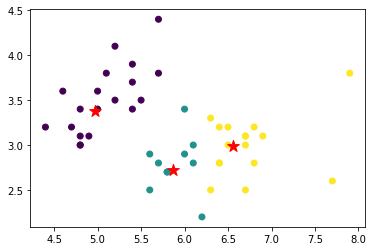

In [17]:
plt.scatter(X_test[['sepal_length']], X_test[['sepal_width']], c=lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
# plt.show()

In [18]:
kmeans = KMeans(n_clusters=3) # предполагаю, что количество кластеров == variety. Самый простой вариант
clusters = kmeans.fit_predict(df)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

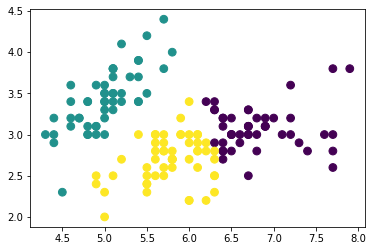

In [19]:
plt.scatter(df[['sepal_length']], df[['sepal_width']], c=clusters, s=60)

In [20]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10) # пока не понял, какое оптимальное количество подобрать

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

C:\Users\Johan.DESKTOP-53JNTRO.000\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Инерция')

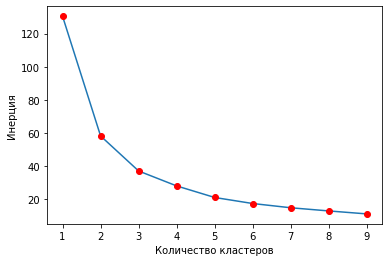

In [21]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')

In [22]:
# после 3 кластеров значения инерций сильно уменьшаются, оставлю три кластера

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html